In [1]:
import matplotlib
#matplotlib.use('Agg')
import datetime
import os
import sys
import json
import glob
import yaml
import math
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
# params = {
#  'axes.labelsize': 14,
#  'font.size': 14,
#  'font.family': 'Roboto',
#  'legend.fontsize': 35,
#  'xtick.labelsize': 20,
#  'ytick.labelsize': 20,
#  'axes.labelsize': 24,
#  'axes.titlesize': 30,
#  'text.usetex': False,
#  'figure.figsize': [12, 12],
# }
#matplotlib.rcParams.update(params)
import seaborn as sns
import pandas as pd
import ase
import pickle
import matplotlib.ticker as ticker

from ase.io.trajectory import Trajectory
from collections import defaultdict
from tqdm import tqdm

from psiturk_dataset.utils.utils import prep_plt

In [2]:
def get_success_std_error(sr):
    samples = int(2195 * sr / 100)
    print(samples, sr)
    x = np.zeros(2195)
    x[:samples] = 100
    return np.std(x) / np.sqrt(x.shape[0])

## Fitting Linear Model

In [3]:
from sklearn.linear_model import LinearRegression

x = [4, 6, 8, 10, 12, 24, 35] #, 40]
y = [15.44, 17.49, 20.36, 21.5, 22.32, 27.3, 31.66]#, 30.3]

x_pred = np.log(np.array([40, 50, 60, 80, 100]).reshape(5, 1))

x = np.log(np.array(x))
y = np.array(y)
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

lr_model = LinearRegression().fit(x, y)
scores = lr_model.score(x, y)
print(scores)
print(lr_model.predict(x).reshape(7).tolist())
print(lr_model.coef_)
print(lr_model.intercept_)
print(lr_model.predict(x_pred).reshape(5).tolist())

0.9878601307549979
[14.904090780978308, 17.86964687961644, 19.973742416736364, 21.605805709578558, 22.9392985153745, 28.008950151132556, 30.76846554658326]
[[7.31396127]]
[4.76478751]
[31.74510898109467, 33.377172273936864, 34.710665079732806, 36.81476061685272, 38.44682390969492]


## PickPlace fitting

In [4]:
from sklearn.linear_model import LinearRegression

x = [2.5, 5, 10]
y = [1.44, 11.33, 18.6]

x_pred = np.log(np.array([15, 20, 25, 30]).reshape(4, 1))

x = np.log(np.array(x))
y = np.array(y)
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

lr_model = LinearRegression().fit(x, y)
scores = lr_model.score(x, y)
print(scores)
print(lr_model.predict(x).reshape(3).tolist())
print(lr_model.coef_)
print(lr_model.intercept_)
print(lr_model.predict(x_pred).reshape(4).tolist())

0.9922894539265554
[1.8766666666666705, 10.456666666666667, 19.03666666666667]
[[12.37832345]]
[-9.46547639]
[24.05564492285418, 27.616666666666664, 30.37880972080023, 32.63564492285418]


In [5]:
palette = sns.color_palette(palette='muted', n_colors=5, desat=0.9)
palette
print(palette.as_hex())


['#4f7ac9', '#e68752', '#6fc769', '#d06565', '#9470b0']


In [6]:
palette

[(0.3090196078431374, 0.4784313725490194, 0.7890196078431372),
 (0.9011764705882355, 0.5305882352941176, 0.3223529411764705),
 (0.4337254901960783, 0.779607843137255, 0.41254901960784307),
 (0.8158823529411767, 0.39588235294117635, 0.39588235294117635),
 (0.5823529411764706, 0.4376470588235293, 0.6917647058823531)]

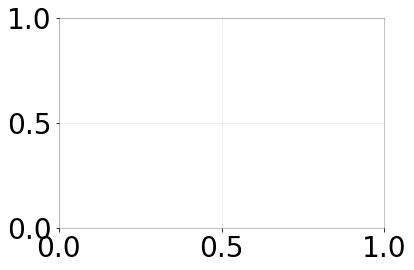

In [7]:

prep_plt()
# plt.style.use('seaborn-muted')
# plt.figure(figsize=(8,7))
# prep_plt()

plt.gca().xaxis.label.set_color((0.1, 0.1, 0.1, .85))
plt.gca().yaxis.label.set_color((0.1, 0.1, 0.1, .85))
plt.rc('axes', labelsize=36)
plt.rc('legend', fontsize=24)

In [8]:
def read_json(path):
    f = open(path)
    return json.loads(f.read())

In [15]:
def plot_lineplot(dataset, x, y,legend, y_label, x_label, ax, ylim, title, dashes=False, multiple=2500, linewidth=3, x_interval=5):
#     ax = sns.lineplot(dataset["x_fit"], dataset["y_fit"], dashes=True, ax=ax, color="#329a32", linestyle="dashed", linewidth=linewidth, markersize=10, label=r'Y = $(6.98\times\log(x)+ 5.4)$')
    ax = sns.lineplot(dataset["x_fit"], dataset["y_fit"], dashes=True, ax=ax, color="#329a32", linestyle="dashed", linewidth=linewidth, markersize=10, label=r'Y = $(12.3\times\log(x) - 9.5)$')
    ax = sns.lineplot(
        dataset[x], dataset[y], dashes=False, ax=ax, marker="o", color='#4f7ac9',
        linewidth=linewidth, markersize=10, label="IL"
    )
#     ax = sns.lineplot(
#         dataset[x], dataset["std_err_lb"], dashes=False, ax=ax, color='#4f7ac9',
#         linewidth=linewidth, alpha=0.4
#     )
#     ax = sns.lineplot(
#         dataset[x], dataset["std_err_ub"], dashes=False, ax=ax, color='#4f7ac9',
#         linewidth=linewidth, alpha=0.4
#     )
    #ax = sns.lineplot(dataset["x_fit"], dataset["rl_y"], dashes=False, ax=ax, color="#f3801a", linewidth=linewidth, markersize=10, label="RL")
    
    ax.fill_between(dataset[x],  dataset["std_err_lb"], dataset["std_err_ub"], color="#4f7ac9", alpha=0.4)
    
    #print(len(dataset["x_fit"]), len(dataset["y_fit"]))
    
    
    #ax.grid(alpha=0.9)
    ax.set_ylim(12, ylim)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(x_interval))
    ax.set_title(title)
    ax.set_xlabel(x_label, labelpad=17)
    ax.set_ylabel(y_label, labelpad=17)
    
    for _,s in ax.spines.items():
        s.set_color('black')
        s.set_alpha(0.8)
        s.set_linewidth(1)
    ax.legend(loc=(.4, 0.04), markerfirst=False, ncol=1, frameon=False, labelspacing=0.4)
    handles,labels = ax.get_legend_handles_labels()

#     handles = [handles[2], handles[1], handles[0]]
#     labels = [labels[2], labels[1], labels[0]]
#     ax.legend(handles,labels, loc=(.22, 0.04), markerfirst=False, ncol=1, frameon=False, labelspacing=0.4)

    handles = [handles[1], handles[0]]
    labels = [labels[1], labels[0]]
    ax.legend(handles,labels, loc=(.25, 0.04), markerfirst=False, ncol=1, frameon=False, labelspacing=0.4)


    sns.despine(ax=ax)

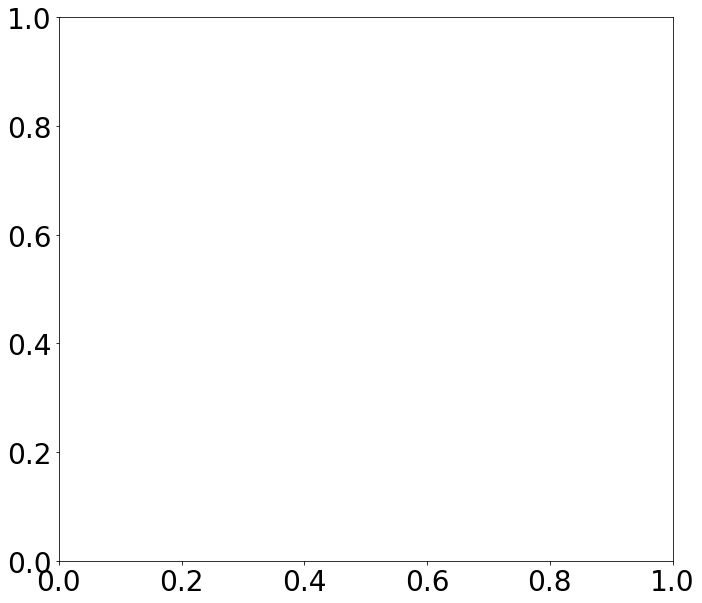

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(11, 10))


### SemSeg Baseline

In [17]:
# RGBD+SemSeg Baseline
dataset = {
    "x": [4, 6, 8, 10, 12, 24, 35, 50],
    "rl_y": [34.6, 34.6, 34.6, 34.6, 34.6, 34.6, 34.6, 34.6, 34.6, 34.6, 34.6, 34.6, 34.6],
    "x_fit": [4, 6, 8, 10, 12, 24, 35, 40, 50, 60, 80, 100],
    #"y_fit": [15.11, 17.94, 19.95, 21.51, 22.78, 27.62, 30.25, 31.18, 32.74, 34.01, 36.02, 37.58],
    "y_fit": [14.904090780978308, 17.86964687961644, 19.973742416736364, 21.605805709578558, 22.9392985153745, 28.008950151132556, 30.76846554658326, 31.74510898109467, 33.377172273936864, 34.710665079732806, 36.81476061685272, 38.44682390969492],
    "y": [15.44, 17.49, 20.36, 21.5, 22.32, 27.3, 31.66, 33.2],
} 

print(np.std(dataset["y"]) / len(dataset["y"]))
dataset["std_err_lb"] = []
dataset["std_err_ub"] = []
dataset["std_err_rl_lb"] = []
dataset["std_err_rl_ub"] = []
for i in range(len(dataset['x'])):
    std_err = get_success_std_error(dataset["y"][i])
    print(std_err)
    dataset["std_err_lb"].append(dataset["y"][i] - std_err)
    dataset["std_err_ub"].append(dataset["y"][i] + std_err)
print(dataset["std_err_lb"])
print(dataset["std_err_ub"])

std_err = get_success_std_error(dataset["rl_y"][0]) 
dataset["std_err_rl_lb"].append(dataset["rl_y"][0] - std_err)
dataset["std_err_rl_ub"].append(dataset["rl_y"][0] + std_err)

# dataset = {
#     "x": [2000, 4000, 8000, 12000],
#     "y": [8.23, 12.26, 14.81, 17.9]
# } 
df = dataset
#df = pd.DataFrame.from_dict(dataset)

0.7004056133178832
338 15.44
0.770393331939719
383 17.49
0.8100777369446418
446 20.36
0.8588366064611741
471 21.5
0.8762485199953273
489 22.32
0.8881619348832855
599 27.3
0.9507756876730088
694 31.66
0.9924720716564459
708 32.3
0.9977467601657525
728 33.2
1.0049141458972302
[14.66960666806028, 16.679922263055357, 19.501163393538825, 20.62375148000467, 21.431838065116715, 26.349224312326992, 30.667527928343553, 31.302253239834243, 32.19508585410277]
[16.21039333193972, 18.30007773694464, 21.218836606461174, 22.37624851999533, 23.208161934883286, 28.25077568767301, 32.65247207165645, 33.29774676016575, 34.204914145897234]
759 34.6


In [18]:
len(dataset["x_fit"])

12

In [19]:
# fig.clf()
prep_plt(ax=axs)
plot_lineplot(df, "x", "y", "", "Success (%)", "Dataset size (x 1k episodes)", axs, 40,"", linewidth=3, x_interval=25)

/home/rramrakhya/research/anaconda3/envs/habitat/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/rramrakhya/research/anaconda3/envs/habitat/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

In [20]:
fig.savefig('figures/sample_efficiency/dataset_size_comparison_1.png', dpi=200)
fig.clf()

### PickPlace baseline

In [39]:
# RGBD+SemSeg Baseline
dataset = {
    "x": [2.5, 5, 10],
    "x_fit": [2.5, 5, 10, 15, 20], #, 25], #, 30],
    "y_fit": [1.8766666666666705, 10.456666666666667, 19.03666666666667, 24.05564492285418, 27.616666666666664], #, 30.37880972080023], # 32.63564492285418],
    "y": [1.44, 11.33, 18.6],
} 

print(np.std(dataset["y"]) / len(dataset["y"]))
dataset["std_err_lb"] = []
dataset["std_err_ub"] = []
dataset["std_err_rl_lb"] = []
dataset["std_err_rl_ub"] = []
for i in range(len(dataset['x'])):
    std_err = get_success_std_error(dataset["y"][i])
    print(std_err)
    dataset["std_err_lb"].append(dataset["y"][i] - std_err)
    dataset["std_err_ub"].append(dataset["y"][i] + std_err)
print(dataset["std_err_lb"])
print(dataset["std_err_ub"])
# dataset = {
#     "x": [2000, 4000, 8000, 12000],
#     "y": [8.23, 12.26, 14.81, 17.9]
# } 
df = dataset
#df = pd.DataFrame.from_dict(dataset)

2.344235377724012
31 1.44
0.251859123869838
248 11.33
0.6757048393244995
408 18.6
0.8303105782721591
[1.188140876130162, 10.6542951606755, 17.769689421727843]
[1.691859123869838, 12.0057048393245, 19.43031057827216]


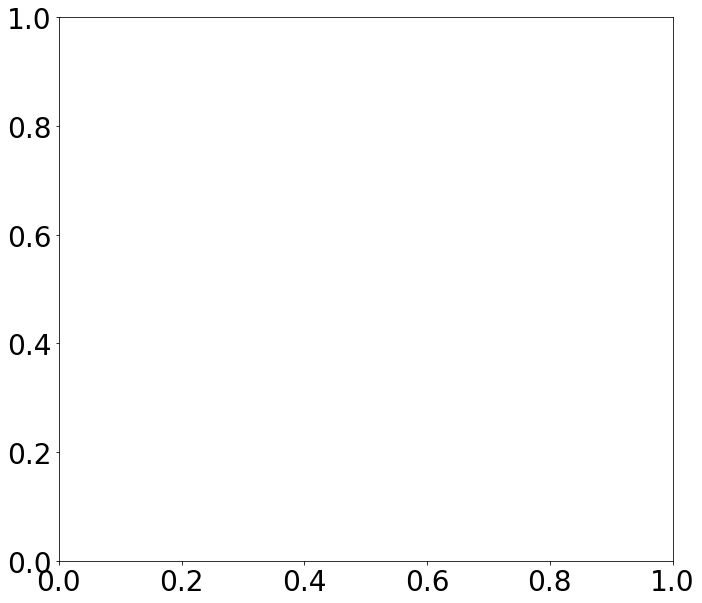

In [40]:
fig, axs = plt.subplots(1, 1, figsize=(11, 10))

In [41]:
# fig.clf()
prep_plt(ax=axs)
plot_lineplot(df, "x", "y", "", "Success (%)", "Dataset size (x 1k episodes)", axs, 30,"", linewidth=3, x_interval=5)

/home/rramrakhya/research/anaconda3/envs/habitat/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/rramrakhya/research/anaconda3/envs/habitat/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

In [42]:
fig.savefig('figures/sample_efficiency/pickplace_dataset_size_comparison.png', dpi=200)
fig.clf()

### RL IL human perf plot

In [29]:
def plot_barplot(X, Y, title="", x_label="", y_label="", ax=None, x_rotation=0, y_rotation=0, color_palette=[], order=[], y_lim=1.0):
    if len(order) == 0 or len(color_palette) == 0:
        plot = sns.barplot(x=X, y=Y, ax=ax, palette=color_palette)
    else:
        plot = sns.barplot(x=X, y=Y, ax=ax) #, palette=color_palette, order=order)

    ax.set_ylim(80, y_lim+1)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

    for item in plot.get_xticklabels():
        item.set_rotation(x_rotation)

    for item in plot.get_yticklabels():
        item.set_rotation(y_rotation)
    
    for i, value in enumerate(Y):
        i = i - 0.2
        plot.text(i, value+0.2, str(value), fontsize=24)
    
#     for i, bar in enumerate(plot.patches):
#         bar.set_color(color_palette[x[i]])

    ax.spines['bottom'].set_color('0.1')
    ax.spines['top'].set_color('0.1')
    ax.spines['right'].set_color('0.1')
    ax.spines['left'].set_color('0.1')
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    
    sns.despine(ax=ax)
    plot.set_title(title, fontsize=46, pad=30)
    plot.set_xlabel(x_label, labelpad=10) #, fontsize=45)
    labelpad = 40
    plot.set_ylabel(y_label, labelpad=0) #, fontsize=45, labelpad = labelpad)

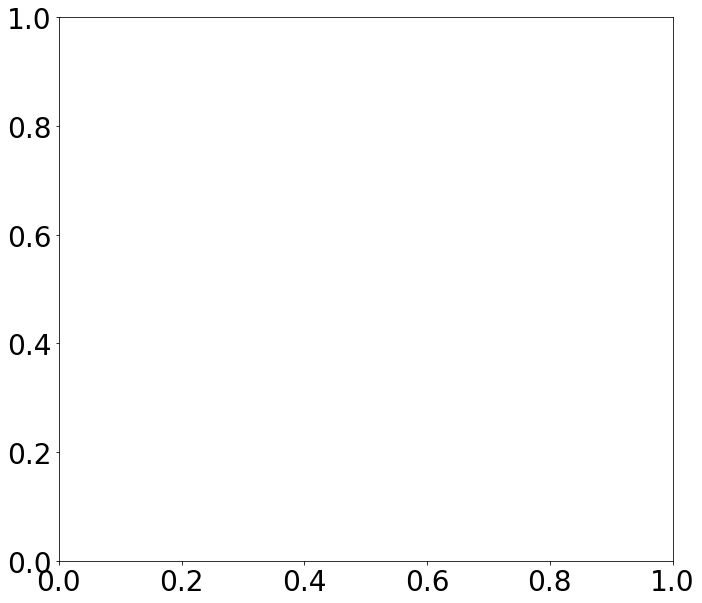

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(11, 10))

In [50]:
palette = sns.color_palette(palette='muted', n_colors=10, desat=0.9)
palette
colors = {
    "IL": "#4f7ac9",
    "RL": "#6fc769",
    "Humans": "#e68752",
    "Humans *": "#e68752",
    "IL Shortest-Path": "#d06565",
}
print(palette.as_hex()[::-1])

['#87c4dd', '#d0b86d', '#797979', '#d783be', '#886140', '#9470b0', '#d06565', '#6fc769', '#e68752', '#4f7ac9']


In [51]:
x = ["IL", "RL", "Humans *"]
#y = [24.4, 24.5]
y = [24.4, 24.5, 93.7]

plot_barplot(x, y, ax=axs, y_lim=100, y_label="Success (%)", title="ObjectNav", color_palette=colors)

fig.savefig('figures/performance/perf.png', dpi=200)
fig.clf()

In [53]:
# x = ["RL", "IL Shortest-Path", "IL", "Humans"]
# y = [0, 1.9, 17.6, 87.2]

x = ["IL", "RL", "Humans"]
y = [17.6, 0, 87.2]
#y = [17.5, 0, 89.1]

plot_barplot(x, y, ax=axs, y_lim=100, y_label="Success (%)", title="Pick-and-Place", color_palette=colors)

fig.savefig('figures/performance/pick_and_place_perf.png', dpi=200)
fig.clf()

### Dataset size comparison

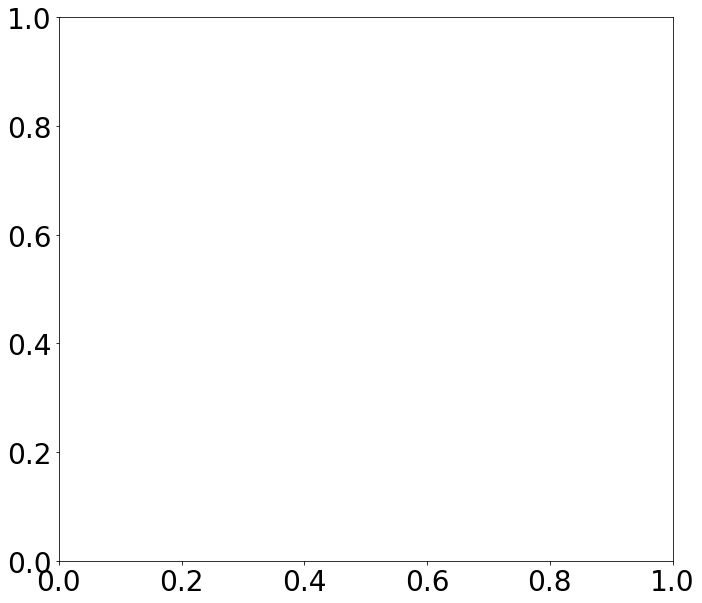

In [36]:
fig, axs = plt.subplots(1, 1, figsize=(11, 10))

In [87]:
# x = ["RL", "IL Shortest-Path", "IL", "Humans"]
# y = [0, 1.9, 17.6, 87.2]

x = ["TeACH", "WAY", "CVDN", "Ours"]
y = [ 3047, 4050, 7000, 52428]
#y = [17.5, 0, 89.1]
colors = {
    "Ours": "#4f7ac9",
    "CVDN": "#6fc769",
    "WAY": "#e68752",
    "Humans *": "#e68752",
    "TeACH": "#d06565",
}

plot_barplot(x, y, ax=axs, y_lim=56000, y_label="# Episodes", title="Dataset size comparison", color_palette=colors)

fig.savefig('figures/performance/dataset_comp.png', dpi=200)
fig.clf()

### SENTRY

In [37]:
# x = ["RL", "IL Shortest-Path", "IL", "Humans"]
# y = [0, 1.9, 17.6, 87.2]

x = ["SENTRY", "CF+SCE+IE", "SENTRY+CF"]
y = [ 94.3, 98.5, 99.03]
#y = [17.5, 0, 89.1]
colors = {
    "SENTRY+CF": "#4f7ac9",
    "SENTRY": "#6fc769",
    "CF+SCE+IE": "#e68752",
    "Humans *": "#e68752",
    "TeACH": "#d06565",
}

plot_barplot(x, y, ax=axs, y_lim=100, y_label="Accuracy (%)", title="", color_palette=colors)

fig.savefig('figures/performance/sentry.png', dpi=200)
fig.clf()

### RGBD baseline

In [80]:
# RGBD Baseline
dataset = {
    "x": [2000, 4000, 6000, 8000, 10000, 12000, 24000],
    "y": [8.23, 12.26, 13.85, 14.81, 16.9, 17.9, 20.1]
} 

# dataset = {
#     "x": [2000, 4000, 8000, 12000],
#     "y": [8.23, 12.26, 14.81, 17.9]
# } 

df = pd.DataFrame.from_dict(dataset)

In [75]:
df

,x,y
0,2000,8.23
1,4000,12.26
2,6000,13.85
3,8000,14.81
4,10000,16.90
5,12000,17.90
6,24000,20.10


In [76]:
# plot_lineplot(df, "x", "y", "", "Success Rate", "Dataset size", axs[0], 30,"")

In [77]:
# fig.savefig('figures/sample_efficiency/val_perf.jpg')
# fig.clf()

### SemSeg Baseline

In [8]:
# RGBD Train Baseline
dataset = {
    "x": [4000, 6000, 8000, 10000, 12000],
    "y": [66.62, 19.47, 27.5, 34.05, 17.06],
    "y_train": [66.62, 37.2, 43.5, 45.05, 19.46]
} 

# dataset = {
#     "x": [2000, 4000, 8000, 12000],
#     "y": [8.23, 12.26, 14.81, 17.9]
# } 

df = pd.DataFrame.from_dict(dataset)

In [5]:
plot_lineplot(df, "x", "y_train", "", "Success Rate", "Dataset size", axs, 100,"")

/home/rramrakhya/research/anaconda3/envs/habitat/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [6]:
fig.savefig('train_performance.jpg')
fig.clf()

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


In [9]:
plot_lineplot(df, "x", "y", "", "Success Rate", "Dataset size", axs, 100,"")

/home/rramrakhya/research/anaconda3/envs/habitat/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [10]:
fig.savefig('train_subset_performance.jpg')
fig.clf()

In [5]:
# RGBD Train Baseline cross entropy
dataset = {
    "x": [4000, 6000, 8000, 10000, 12000],
    "y": [14.37, 16.12, 13.5, 18.28, 20.74],
    "ce": [4.721, 6.136, 4.164, 4.258, 3.36],
} 

# dataset = {
#     "x": [2000, 4000, 8000, 12000],
#     "y": [8.23, 12.26, 14.81, 17.9]
# } 

df = pd.DataFrame.from_dict(dataset)

In [6]:
plot_lineplot(df, "x", "ce", "", "Cross entropy", "Dataset size", axs, 10,"")

/home/rramrakhya/research/anaconda3/envs/habitat/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [7]:
fig.savefig('val_cross_entropy.jpg')
fig.clf()

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


In [2]:
def read_json(path):
    f = open(path)
    d = json.loads(f.read())
    return d

In [3]:
stats_6k = read_json("../data/episodes/objectnav_sample/objectnav_mp3d_6k.json")
stats_4k = read_json("../data/episodes/objectnav_sample/objectnav_mp3d_4k.json")
stats_8k = read_json("../data/episodes/objectnav_sample/objectnav_mp3d_8k.json")
stats_10k = read_json("../data/episodes/objectnav_sample/objectnav_mp3d_10k.json")
stats_12k = read_json("../data/episodes/objectnav_sample/objectnav_mp3d_12k.json")

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


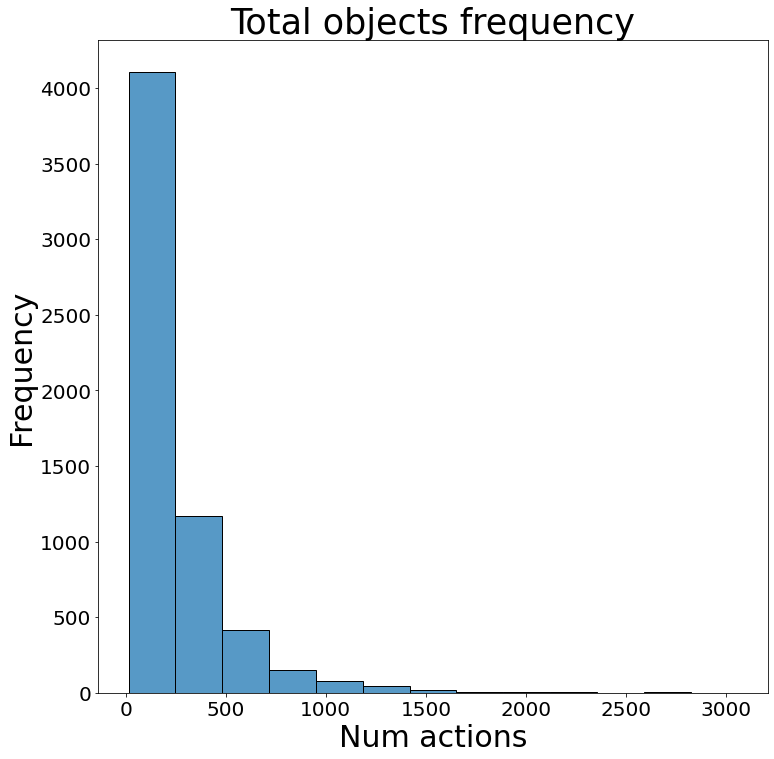

In [4]:
sns.histplot(stats_6k["episode_length"], bins=13)
plt.gca().set(title='Total objects frequency', ylabel='Frequency', xlabel='Num actions')
plt.savefig("action_distribution.jpg")

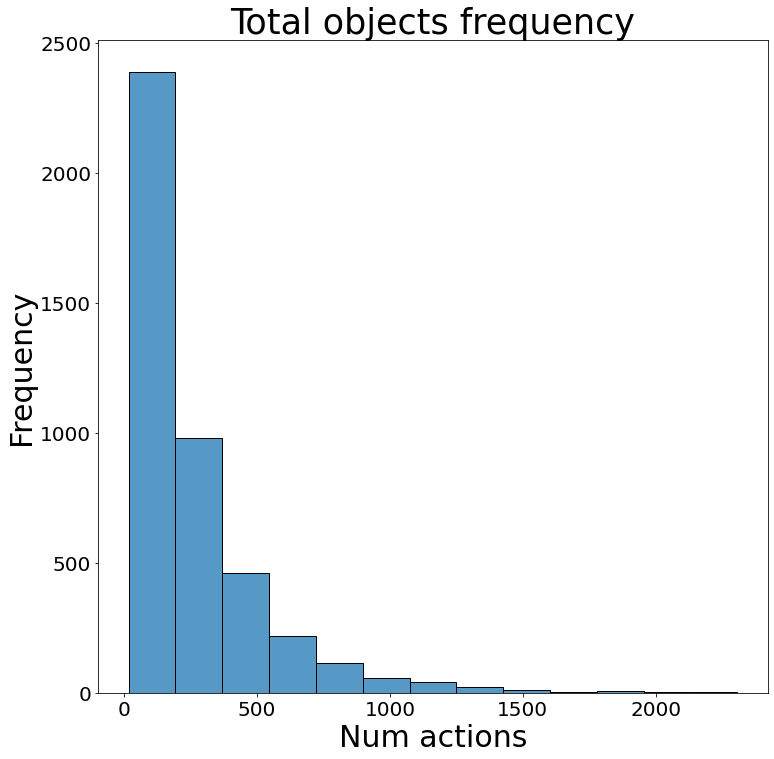

In [5]:
sns.histplot(stats_4k["episode_length"], bins=13)
plt.gca().set(title='Total objects frequency', ylabel='Frequency', xlabel='Num actions')
plt.savefig("action_distribution.jpg")

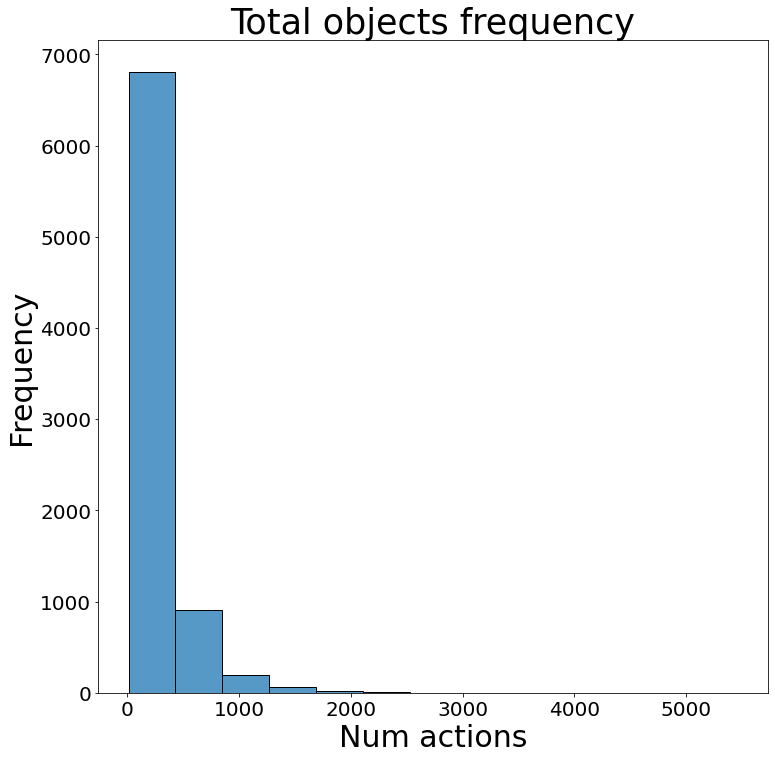

In [6]:
sns.histplot(stats_8k["episode_length"], bins=13)
plt.gca().set(title='Total objects frequency', ylabel='Frequency', xlabel='Num actions')
plt.savefig("action_distribution.jpg")

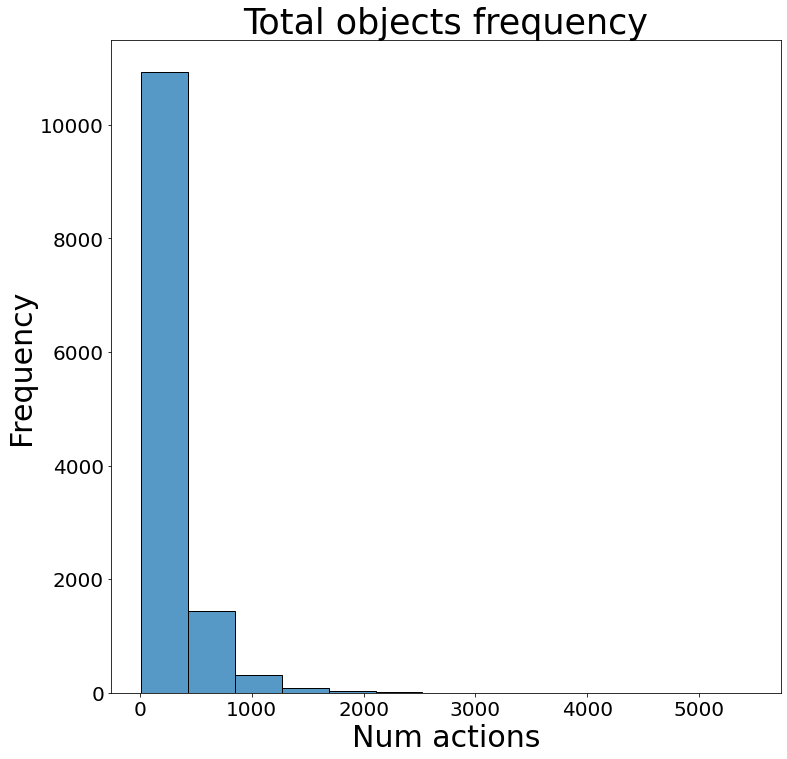

In [7]:
sns.histplot(stats_12k["episode_length"], bins=13)
plt.gca().set(title='Total objects frequency', ylabel='Frequency', xlabel='Num actions')
plt.savefig("action_distribution.jpg")

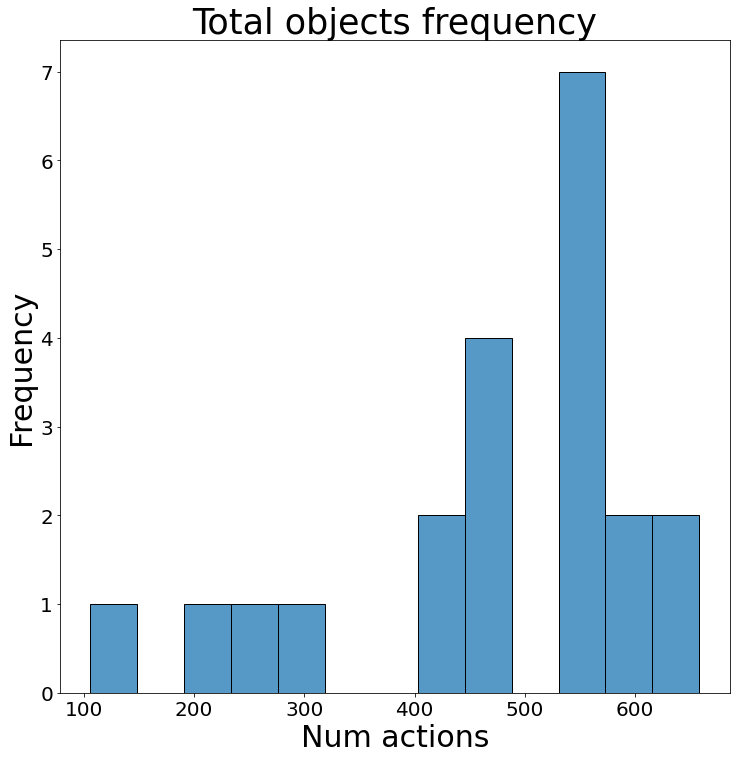

In [8]:
sns.histplot(stats_10k["object_frequency"], bins=13)
plt.gca().set(title='Total objects frequency', ylabel='Frequency', xlabel='Num actions')
plt.savefig("action_distribution.jpg")

In [9]:
for key, val  in sorted(stats_4k['object_frequency'].items()):
    print(key, val/4000)

bathtub 0.04575
bed 0.06275
cabinet 0.06775
chair 0.071
chest_of_drawers 0.059
clothes 0.02
counter 0.0585
cushion 0.05975
fireplace 0.032
gym_equipment 0.0115
picture 0.05725
plant 0.0525
seating 0.04625
shower 0.05025
sink 0.06325
sofa 0.06225
stool 0.05
table 0.07025
toilet 0.057
towel 0.05325
tv_monitor 0.027


In [10]:
for key, val in sorted(stats_6k['object_frequency'].items()):
    print(key, val/6000)

bathtub 0.042833333333333334
bed 0.057833333333333334
cabinet 0.06183333333333333
chair 0.065
chest_of_drawers 0.05416666666666667
clothes 0.02
counter 0.054
cushion 0.05533333333333333
fireplace 0.030166666666666668
gym_equipment 0.010666666666666666
picture 0.05333333333333334
plant 0.04833333333333333
seating 0.042333333333333334
shower 0.04766666666666667
sink 0.057666666666666665
sofa 0.057166666666666664
stool 0.04733333333333333
table 0.06566666666666666
toilet 0.052833333333333336
towel 0.04883333333333333
tv_monitor 0.027


In [11]:
for key, val in sorted(stats_12k['object_frequency'].items()):
    print(key, val/12000)

bathtub 0.04591666666666667
bed 0.06175
cabinet 0.06583333333333333
chair 0.0695
chest_of_drawers 0.058
clothes 0.02125
counter 0.057833333333333334
cushion 0.059083333333333335
fireplace 0.03233333333333333
gym_equipment 0.011333333333333334
picture 0.056666666666666664
plant 0.051666666666666666
seating 0.04525
shower 0.050833333333333335
sink 0.06191666666666667
sofa 0.06075
stool 0.05025
table 0.07008333333333333
toilet 0.0565
towel 0.052333333333333336
tv_monitor 0.02875


In [16]:
for key, val in sorted(stats_val['object_frequency'].items()):
    print(key, val/1582)

bathtub 0.03729456384323641
bed 0.0695322376738306
cabinet 0.06573957016434892
chair 0.0632111251580278
chest_of_drawers 0.06005056890012642
clothes 0.01580278128950695
counter 0.05246523388116309
cushion 0.051833122629582805
fireplace 0.03034134007585335
gym_equipment 0.009481668773704172
picture 0.05752212389380531
plant 0.04677623261694058
seating 0.04424778761061947
shower 0.05056890012642225
sink 0.054993678887484194
sofa 0.054993678887484194
stool 0.04108723135271808
table 0.06005056890012642
toilet 0.05815423514538559
towel 0.05246523388116309
tv_monitor 0.02338811630847029


In [13]:
stats_val = read_json("../data/episodes/objectnav_sample/objectnav_mp3d_sub_val.json")

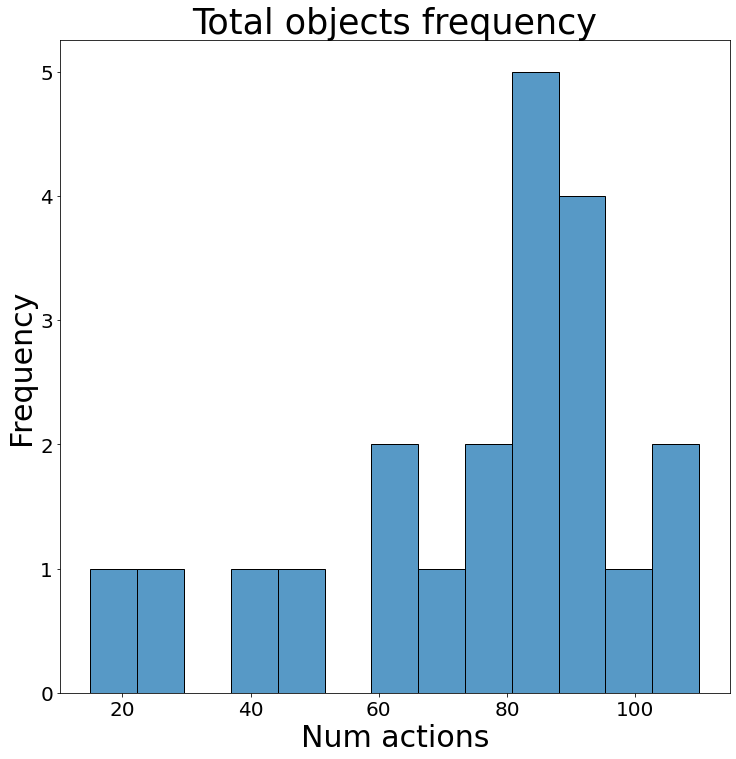

In [15]:
sns.histplot(stats_val["object_frequency"], bins=13)
plt.gca().set(title='Total objects frequency', ylabel='Frequency', xlabel='Num actions')
plt.savefig("action_distribution.jpg")

In [ ]:
stats_val